### Import Necessary Libraries

In [1]:
import librosa
song, sr1 = librosa.load(r"C:\Users\Hemanth\Desktop\9s8n5-e7bsk (mp3cut.net).wav")
print(len(song)," ",sr1)

330750   22050


### Plotting Waveform of a engine sound 

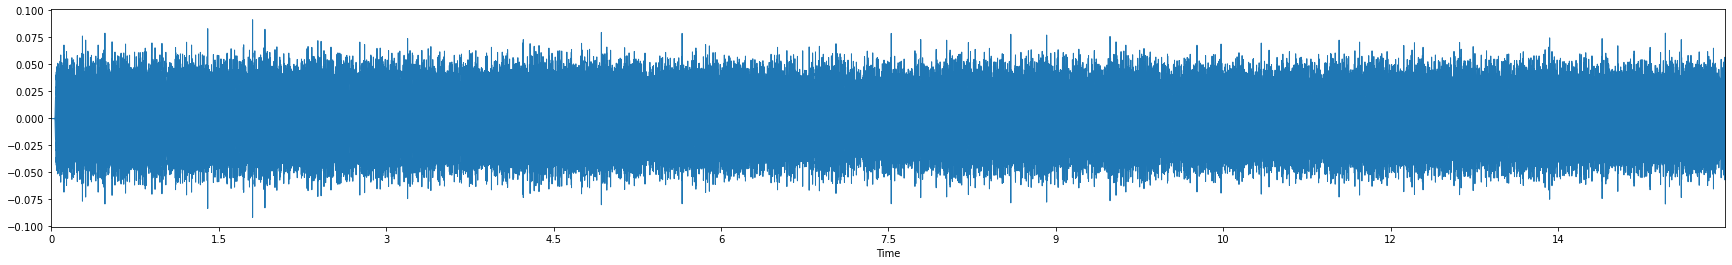

In [2]:
from matplotlib import pyplot as plt
import librosa.display
plt.figure(figsize=(30, 4))
librosa.display.waveplot(song, sr=sr1)

In [3]:
import scipy
import scipy.signal
f, t,Zxx= scipy.signal.stft(song, fs=sr1, window='hamming', nperseg=180,
                        noverlap=None, nfft=2048, detrend=False, return_onesided=True, padded=True,
                        axis=-1)

1025   3676   1025


### Applying Short time fourier tranform and plotting Spectrogram

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


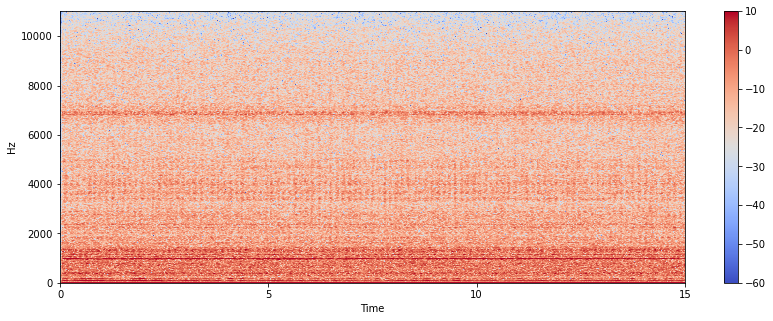

In [4]:
X = librosa.stft(song)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()

### Wave form of a music

330750   22050


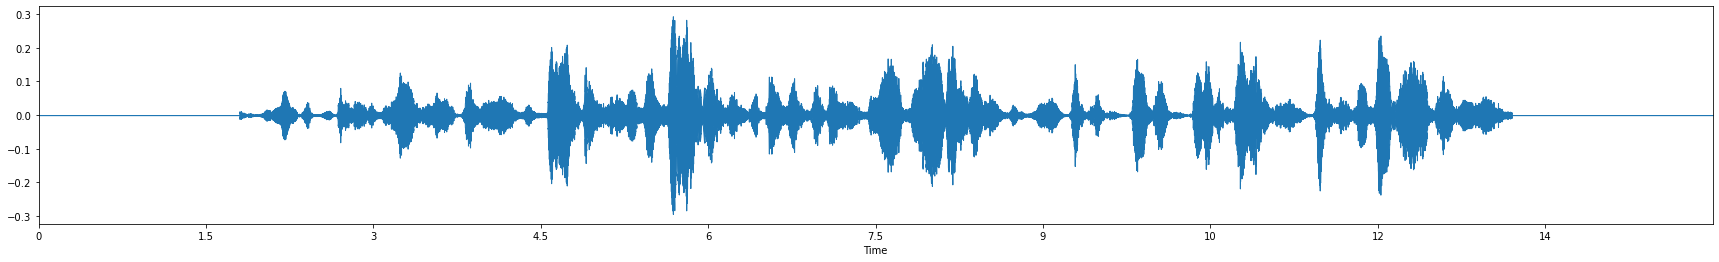

In [5]:
import numpy as np 
data,fs = librosa.load(r'D:\Datasets\QR--151600 (mp3cut.net).wav')
# data,fs = librosa.load(r'C:\Users\Hemanth\Desktop\ButtaBomma Mp3 Song Download Armaan Malik 2019 wellmp3songs.com (mp3cut.net).wav')

zero=np.zeros(39690)
zero1=np.zeros(39690)
# zero=np.zeros(28769)
# zero1=np.zeros(28770)
new=np.append(data,zero)

data=np.append(zero1,new)
plt.figure(figsize=(30, 4))
librosa.display.waveplot(data, sr=fs)
print(len(data)," ",fs)

In [6]:
import scipy
import scipy.signal
f_song1, t_song1,Zxx_song1= scipy.signal.stft(data, fs=sr1, window='hamming', nperseg=180,
                        noverlap=None, nfft=2048, detrend=False, return_onesided=True, padded=True,
                        axis=-1)
print(len(f_song1)," ",len(t_song1)," ",len(Zxx_song1))

1025   3676   1025


Spectrogram of music

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


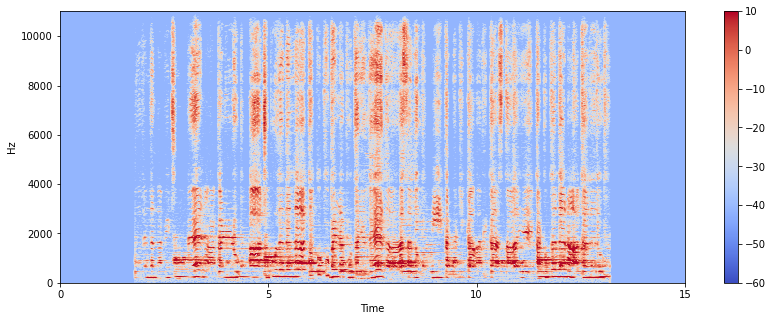

In [7]:
X_noise_song = librosa.stft(data)
Xdb = librosa.amplitude_to_db(X_noise_song)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()

### Mixing both the signals

In [8]:
noise_song = song + data

In [9]:
import scipy
import scipy.signal
f_song, t_song,Zxx_song= scipy.signal.stft(noise_song, fs=sr1, window='hamming', nperseg=180,
                        noverlap=None, nfft=2048, detrend=False, return_onesided=True, padded=True,
                        axis=-1)
print(len(f_song)," ",len(t_song)," ",len(Zxx_song))

1025   3676   1025


### Spectrogram of a mixed signal

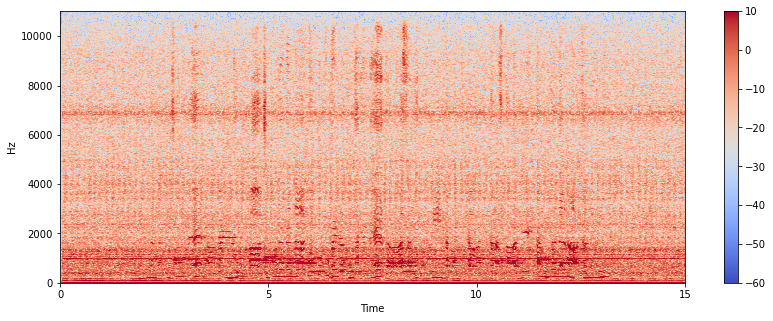

In [10]:
X_noise_song = librosa.stft(noise_song)
Xdb = librosa.amplitude_to_db(X_noise_song)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()

In [11]:
import IPython.display as ipd
ipd.Audio(noise_song,rate=sr1)

In [12]:
import librosa
signal, sr = librosa.load(r"C:\Users\Hemanth\Desktop\9n1o3-ry4fe (mp3cut.net).wav")
print(len(signal)," ",sr)

330750   22050


In [13]:
import IPython.display as ipd
ipd.Audio(r"C:\Users\Hemanth\Desktop\9n1o3-ry4fe (mp3cut.net).wav")

### Waveform of a mixed signal

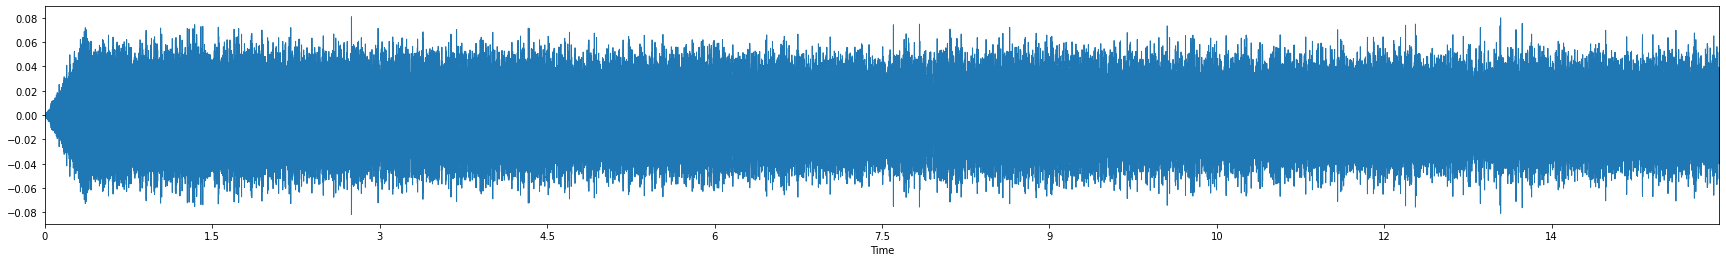

In [14]:
from matplotlib import pyplot as plt
import librosa.display
plt.figure(figsize=(30, 4))
librosa.display.waveplot(signal, sr=sr)

In [15]:
import scipy
import scipy.signal
f, t,Zxx= scipy.signal.stft(signal, fs=sr, window='hamming', nperseg=180,
                        noverlap=None, nfft=2048, detrend=False, return_onesided=True, padded=True,
                        axis=-1)
print(len(f)," ",len(t)," ",len(Zxx))

1025   3676   1025


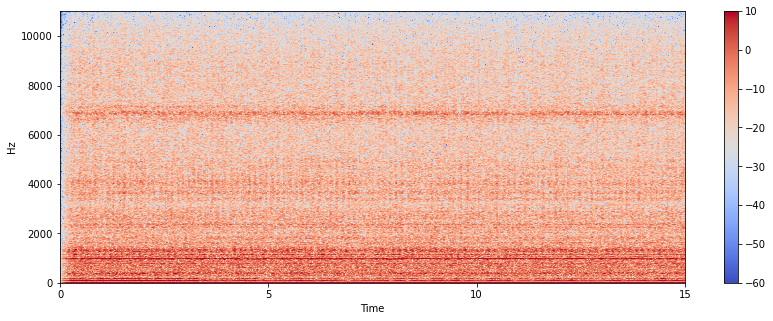

In [16]:
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.clim(-60,10)
plt.colorbar()

## Separating signals into source signals using blind source seperation - NMF algorithm

## librosa.decompose.decompose
We will use librosa.decompose.decompose to perform our factorization. librosa uses sklearn.decomposition.NMF by default as its factorization method.

In [17]:
X, X_phase = librosa.magphase(X_noise_song)
n_components = 2
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)

In [18]:
print(W.shape)
print(H.shape)

(1025, 2)
(2, 646)


### Let's display the spectral profiles

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


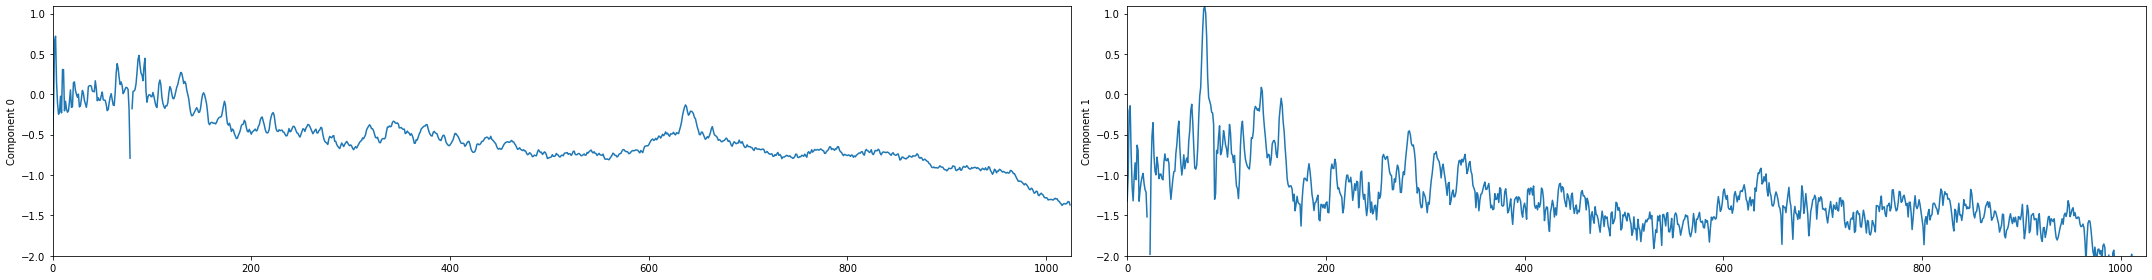

In [19]:
import numpy
plt.figure(figsize=(30,4))
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-2, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)
    plt.tight_layout()

### Let's display the temporal activations

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


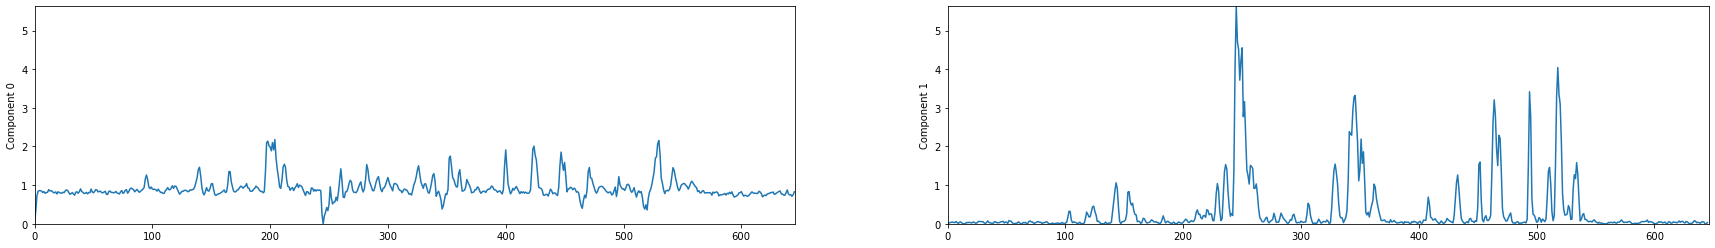

In [20]:
plt.figure(figsize=(30,4))
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)


### Finally, re-create the individual components, and listen to them. To do this, we will reconstruct the magnitude spectrogram from the NMF outputs and use the phase spectrogram from the original signal.

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.outer is deprecated and will be removed in SciPy 2.0.0, use numpy.outer instead


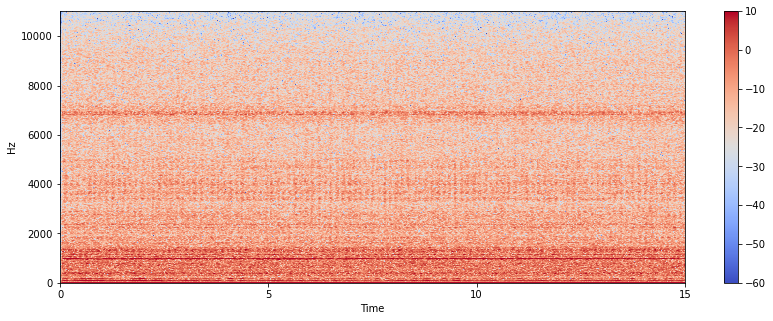

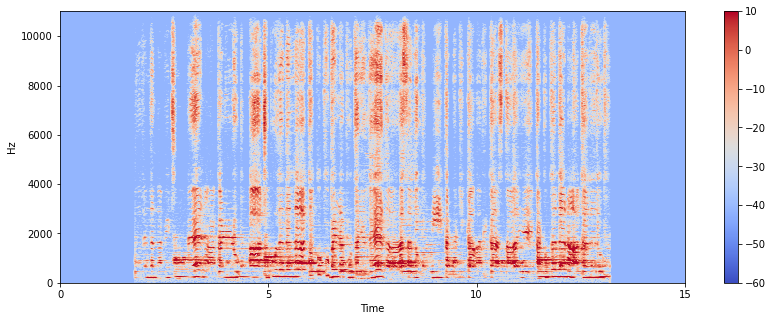

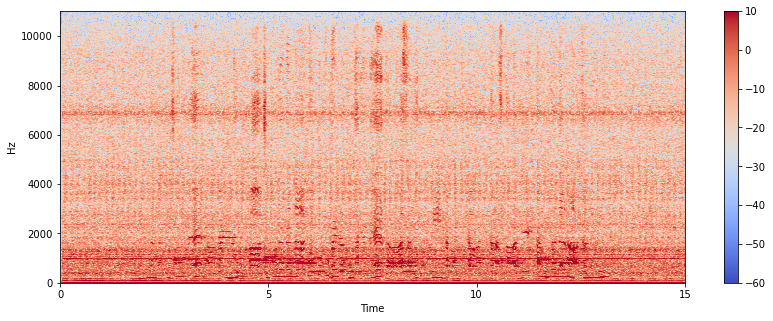

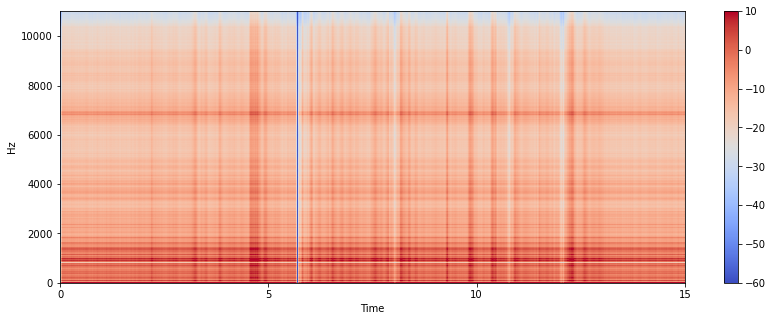

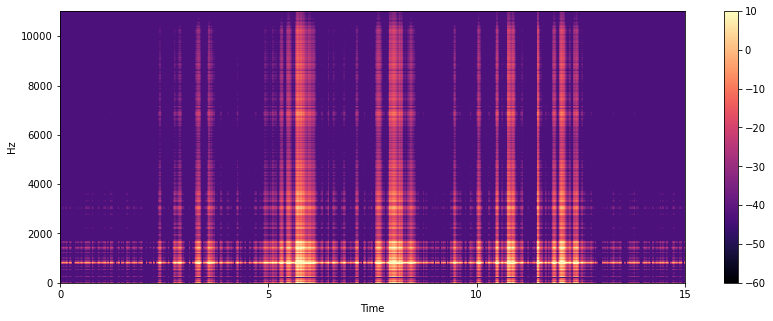

In [21]:
X = librosa.stft(song)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()

X_noise_song = librosa.stft(data)
Xdb = librosa.amplitude_to_db(X_noise_song)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()


X_noise_song = librosa.stft(noise_song)
Xdb = librosa.amplitude_to_db(X_noise_song)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.clim(-60, 10)
plt.colorbar()

for n in range(n_components):
    Y = scipy.outer(W[:,n], H[n])*numpy.exp(1j*numpy.angle(X_noise_song))
    Xdb = librosa.amplitude_to_db(Y)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
    plt.clim(-60,10)
    plt.colorbar()

In [22]:
import IPython
reconstructed_signal = scipy.zeros(330750)
components = list()
for n in range(n_components):
    Y = scipy.outer(W[:,n], H[n])*numpy.exp(1j*numpy.angle(X_noise_song))
    y = librosa.istft(Y)
    components.append(y)
    reconstructed_signal[:len(y)] += y
    IPython.display.display( IPython.display.Audio(y, rate=fs) )

C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  
C:\Users\Hemanth\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.outer is deprecated and will be removed in SciPy 2.0.0, use numpy.outer instead
  """
